In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

IMG_SIZE = (224, 224)
BATCH_SIZE = 128

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)
# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5846 images belonging to 7 classes.
Found 647 images belonging to 7 classes.
Found 717 images belonging to 7 classes.


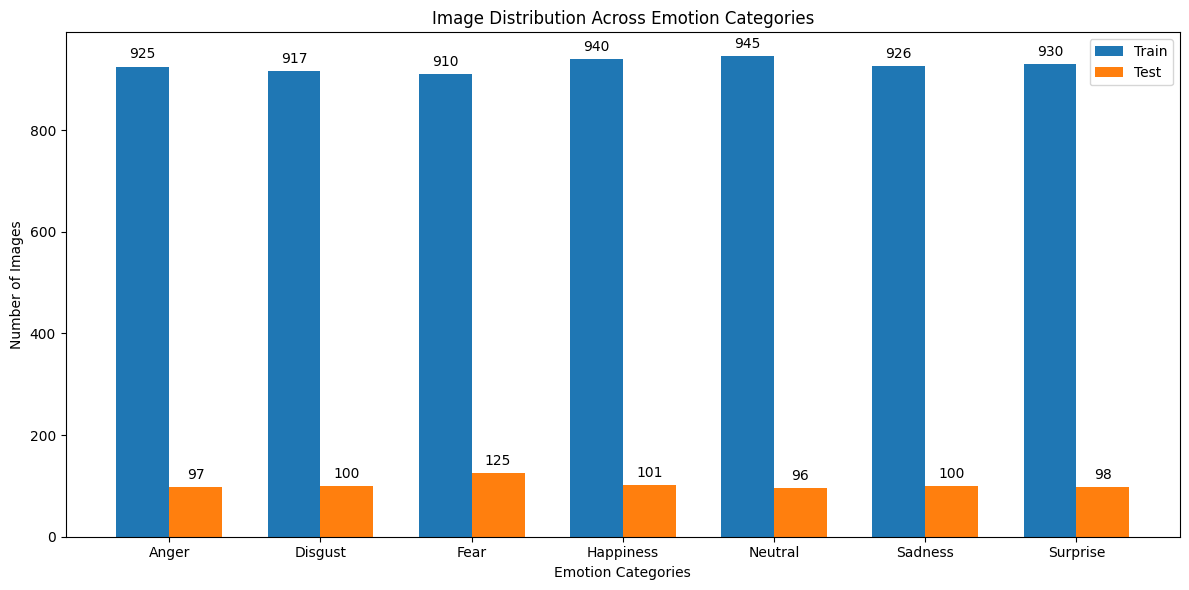

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
test_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize counts for each category
train_counts = {emotion: 0 for emotion in emotion_categories}
test_counts = {emotion: 0 for emotion in emotion_categories}

# Count images in train dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(train_data_path, emotion)
    train_counts[emotion] = len(os.listdir(emotion_path))

# Count images in test dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(test_data_path, emotion)
    test_counts[emotion] = len(os.listdir(emotion_path))

df = pd.DataFrame({
    'Emotion': emotion_categories,
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(emotion_categories))
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Emotion Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Emotion Categories')
ax.set_xticks(x)
ax.set_xticklabels(emotion_categories)
ax.legend()

# Add count labels using the provided code snippet
for index, row in df.iterrows():
    plt.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    plt.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)
    all_img_files = os.listdir(emotion_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(emotion_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [emotion] * len(img_paths))

Output hidden; open in https://colab.research.google.com to view.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    brightness_range=[0.8, 1.2], # Add brightness adjustment
    shear_range=0.2,  # Apply shearing for data augmentation
    zoom_range=0.2,   # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Loop through each emotion category and plot sample images
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)

    # Randomly select an image from the directory
    img_name = random.choice(os.listdir(emotion_path))
    img_path = os.path.join(emotion_path, img_name)

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    img = img.convert('RGB')  # Ensure RGB format
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Generate augmented images
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    # Plot original and augmented images
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {emotion} Image")

    for i, aug_img in enumerate(augmented_imgs):
        aug_img = (aug_img * 255).astype('uint8')  # Rescale augmented image to 0-255
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {emotion} Image {i+1}")

    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [7]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)  # Use pre-created metric
    recall = recall_metric(y_true, y_pred)      # Use pre-created metric
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained EfficientNetB3 model without the top classification layer
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Existing Dense layer
x = Dropout(0.5)(x)  # Dropout after the first Dense layer
x = Dense(1024, activation='relu')(x)  # Second Dense layer
x = Dropout(0.5)(x)  # Dropout after the second Dense layer
x = Dense(512, activation='relu')(x) # final dense layer
x = Dropout(0.5)(x)  # Dropout after the final dense layer
output = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ cast[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)             

 Total params: 10,789,376 (41.16 MB)

 Trainable params: 3,020,807 (11.52 MB)

 Non-trainable params: 7,768,569 (29.63 MB)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2389s 52s/step - accuracy: 0.2433 - f1_score: 0.0287 - loss: 1.8545 - precision: 0.5024 - recall: 0.0387 - val_accuracy: 0.3969 - val_f1_score: 0.1641 - val_loss: 1.5756 - val_precision: 0.6688 - val_recall: 0.1609
Epoch 2/30
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4141 - f1_score: 0.1707 - loss: 1.4523 - precision: 0.6500 - recall: 0.2031

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.4141 - f1_score: 0.1707 - loss: 1.4523 - precision: 0.6500 - recall: 0.2031 - val_accuracy: 0.3703 - val_f1_score: 0.1755 - val_loss: 1.5921 - val_precision: 0.6573 - val_recall: 0.1469
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4519 - f1_score: 0.2062 - loss: 1.4229 - precision: 0.6564 - recall: 0.2333 - val_accuracy: 0.4266 - val_f1_score: 0.2698 - val_loss: 1.5077 - val_precision: 0.6170 - val_recall: 0.2266
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.5625 - f1_score: 0.2731 - loss: 1.2568 - precision: 0.7241 - recall: 0.3281 - val_accuracy: 0.4250 - val_f1_score: 0.2749 - val_loss: 1.4670 - val_precision: 0.6192 - val_recall: 0.2313
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5149 - f1_score: 0.2906 - loss: 1.3051 - precision: 0.6715 - recall: 0.3032 - val_accuracy: 0.5250 - val_f1_score: 0.3278 - val_loss: 1.3062 - val_precision: 0.7076 - val_recall: 0.2609
Epoch 6

In [10]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5738 - f1_score: 0.5402 - loss: 1.2319 - precision: 0.6407 - recall: 0.4639
Test Accuracy: 58.42%


In [11]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.3029 - f1_score: 0.5359 - loss: 3.2970 - precision: 0.3204 - recall: 0.2500 - val_accuracy: 0.5188 - val_f1_score: 0.5295 - val_loss: 1.4643 - val_precision: 0.5979 - val_recall: 0.4437
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.5312 - f1_score: 0.5294 - loss: 1.3350 - precision: 0.6047 - recall: 0.4062 - val_accuracy: 0.5281 - val_f1_score: 0.5294 - val_loss: 1.3643 - val_precision: 0.6313 - val_recall: 0.4469
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5792 - f1_score: 0.5297 - loss: 1.1310 - precision: 0.6850 - recall: 0.4658 - val_accuracy: 0.6187 - val_f1_score: 0.5319 - val_loss: 1.0794 - val_precision: 0.7134 - val_recall: 0.5250
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.6641 - f1_score: 0.5323 - loss: 1.0468 - precision: 0.7692 - recall: 0.5469 - val_accuracy: 0.6156 - val_f1_score: 0.5325 - val_loss: 1.0821 - val_precision: 0.6846 - val_recall: 0.

In [12]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8083 - f1_score: 0.6756 - loss: 0.6470 - precision: 0.8129 - recall: 0.7978
Test Accuracy: 82.53%


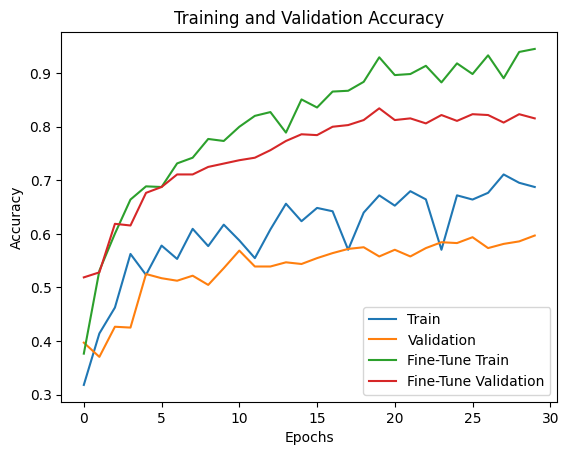

In [13]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

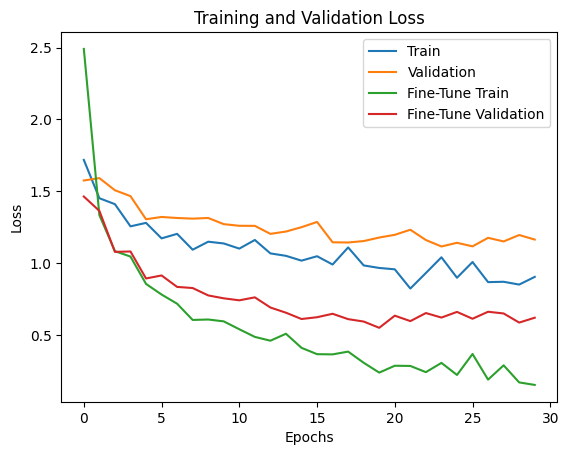

In [14]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

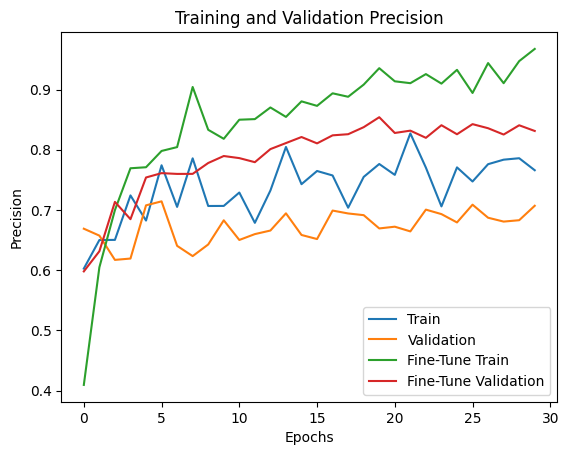

In [15]:
# Plot training & validation precision
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Validation')
plt.plot(fine_tune_history.history['precision'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_precision'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')
plt.show()

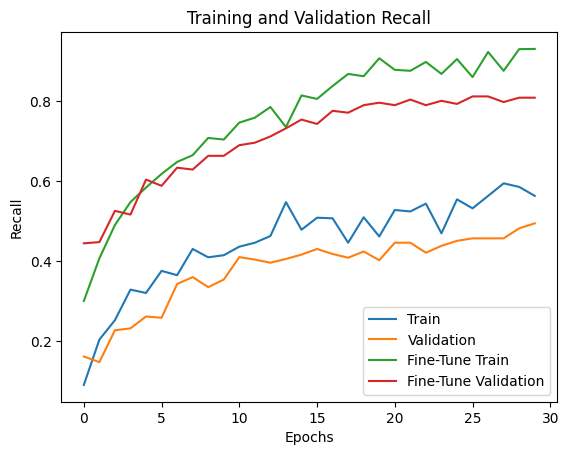

In [16]:
# Plot training & validation recall
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Validation')
plt.plot(fine_tune_history.history['recall'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_recall'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')
plt.show()

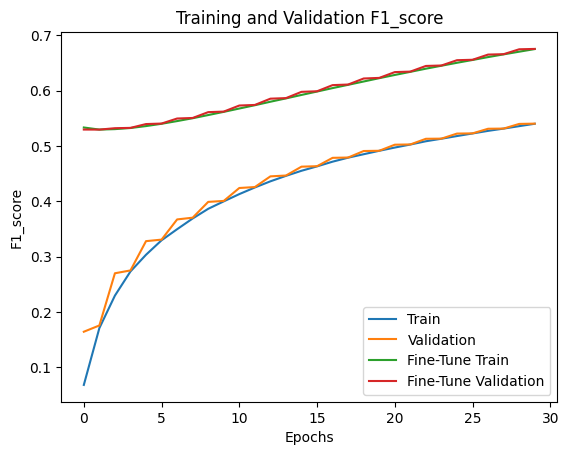

In [17]:
# Plot training & validation f1_score
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Validation')
plt.plot(fine_tune_history.history['f1_score'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_f1_score'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.legend()
plt.title('Training and Validation F1_score')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step


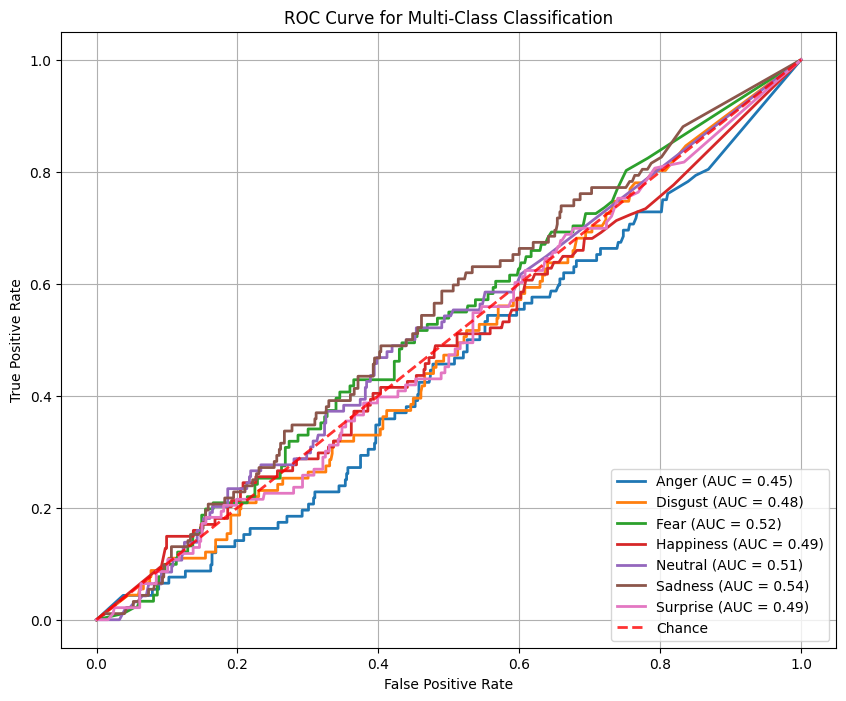

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(validation_generator)
y_val = validation_generator.classes
plt.figure(figsize=(10, 8))

# Initialize dictionaries before the loop
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class inside the loop
n_classes = len(emotion_categories)  # Ensure n_classes is correct
y_val_binary = label_binarize(y_val, classes=range(n_classes)) # Binarize with correct classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'{emotion_categories[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


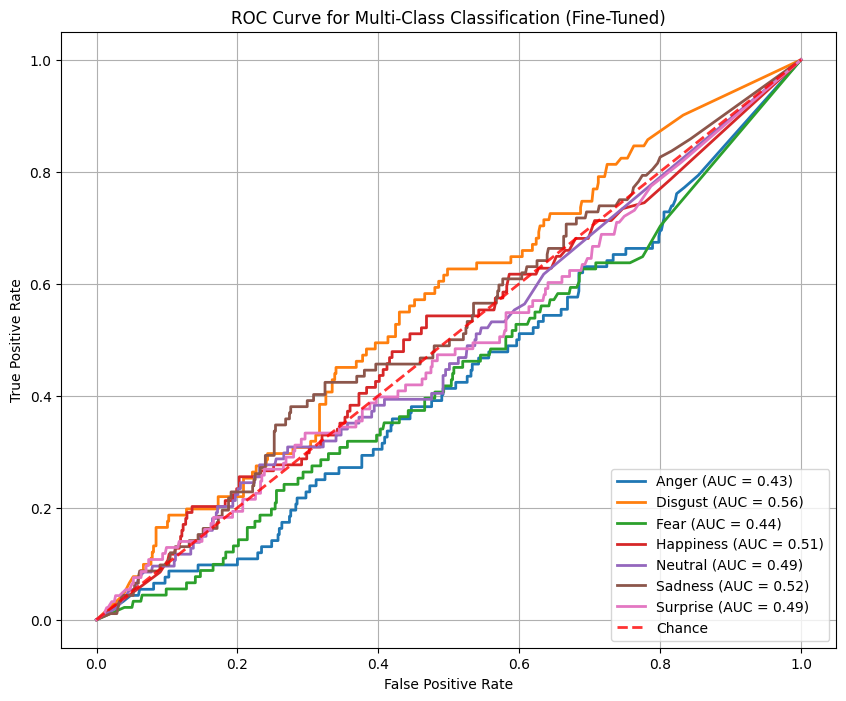

In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming 'fine_tune_history' stores the history of the fine-tuning phase
# Get predictions and true labels from the fine-tuning phase
y_pred_prob = model.predict(validation_generator)  # Predictions from fine-tuned model
y_val = validation_generator.classes  # True labels from validation set

plt.figure(figsize=(10, 8))

# Initialize dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
n_classes = len(emotion_categories)
y_val_binary = label_binarize(y_val, classes=range(n_classes))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'{emotion_categories[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Fine-Tuned)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


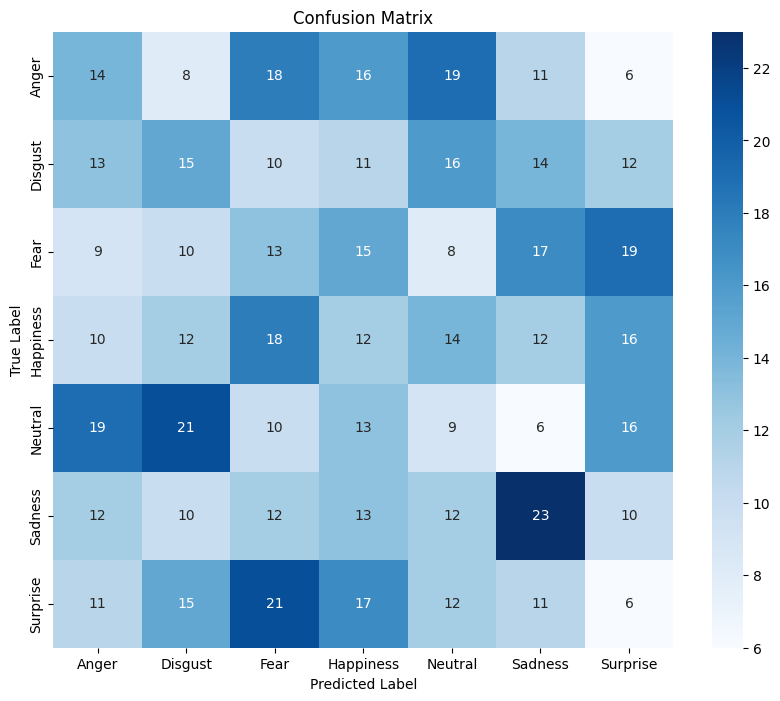

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_val

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix_custom(cm, class_names):
    """Custom heatmap for the confusion matrix."""
    plt.figure(figsize=(10, 8))  # Adjust size if needed
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
# Plot the confusion matrix
plot_confusion_matrix_custom(cm, emotion_categories)

In [21]:
model.save('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25_EfficientNetB2_1024_512.h5')

In [22]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.6 MB/s eta 0:00:00


In [23]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def grad_cam_heatmap(model, image, layer_name='top_activation'): # Changed penultimate layer name to 'top_activation'
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_heatmap(model, x) # Now calls the function with updated penultimate_layer
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/doubletap'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/bean'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/Endrike'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [27]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/mixed'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/pep'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [35]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='top_activation'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/trump'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path) # target_size is removed as it's already 224x224
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display (shortened)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Function to get random images
def get_random_images(emotion_path, num_images=3, random_state=None):
    """Returns a list of paths to random images from the given emotion path."""
    if random_state:
        random.seed(random_state)  # Set random seed for reproducibility
    image_files = os.listdir(emotion_path)
    random_images = random.sample(image_files, num_images)
    return [os.path.join(emotion_path, img) for img in random_images]

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'):
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam # Added indentation here

# Set random seed (you can change this to any integer)
random_state = 53

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test', emotion)

    # Get random image paths using the function with random state
    img_paths = get_random_images(emotion_path, num_images=3, random_state=random_state)

     # Loop through 3 images for each emotion
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [38]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/pep'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/Endrike'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/trump'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [41]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/doubletap'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [42]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/bean'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_plus_plus_heatmap(model, image, layer_name='top_activation'): # or 'block7a_project_conv'
    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Specify the folder containing images
image_folder = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/mixed'  # Replace with your folder path

# Loop through all JPG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_folder, filename)

        # Load and preprocess the image (assuming 224x224 RGB)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Generate heatmap
        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img); axes[0].axis('off')
        axes[1].imshow(img); axes[1].imshow(heatmap, cmap='jet', alpha=0.5); axes[1].axis('off')
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        plt.tight_layout(); plt.show()

Output hidden; open in https://colab.research.google.com to view.